Final Project Submission
Please fill out:

    Student name: KELVIN. K. MURIUKI
    Student pace: FULL TIME
    Scheduled project review date/time: 12TH MARCH 2023 at 00:00HRS
    Instructor name: MR WILLIAM OKOMBA
    Blog post URL:

# Importing Libraries.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



# Loading data

In [2]:
#Establishing a connection to the database.
conn = sqlite3.connect('im.db')

# q1 repsents columns from movie_basics(q1) while q2 rep Movie_rating(q2) columns
q1 = """
SELECT * 
FROM movie_basics;"""

q2 = """
SELECT * 
FROM movie_ratings;"""

pd.read_sql(q1, conn)
# Table on Movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
# Table on movie_rating
pd.read_sql(q2, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# This is a dataframe repsenting various studios income from both domestic and foreign markets for specific years
df = pd.read_csv("bom.movie_gross.csv")
#df.loc(columns)
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
#df1 = pd.read_csv("bom.movie_gross.csv")
#df1

# Perfoming a join

In [6]:
#perfoming a join (df1)
joined_tab = """
SELECT 
*
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    

;"""
df1 = pd.read_sql(joined_tab, conn)
df1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


# Data Cleaning    
A descriptive statistics summary for the combained table.


In [7]:
df1.shape

(73856, 8)

In [8]:
df1.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [9]:
# General information form the movie_basics and Movie_rating tables.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Form the info breakdown this shows that both runtime_minutes and genres ahs got some missing values.

In [10]:
# A General information about the gross revenue table.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above table Domestic_gross columns and  foreign_gross has got some missing values.

In [11]:
print(df['foreign_gross'].dtype)

object


In [12]:
# converting the column to type string.
df['foreign_gross'] = df['foreign_gross'].astype(str)

In [13]:
# This will replace any commas and NaN with empty values.
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].str.replace(',', ''), errors='coerce')

In [14]:
#df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').str.replace("'", '')


In [15]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'])
print(df['foreign_gross'].dtype)

float64


# ## Checking for missing values

In [16]:
# Checking for total number of Missing values on Movie_basics and Movies_rating
df1.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [17]:
# Total number of missing values in rating tables.
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [18]:
# getting the mean of domestic gross rounded off to two decimal places.
average_domestic = round( df.domestic_gross.mean())
average_foreign = round(df.foreign_gross.mean())
print("The average domestic_gross",average_domestic)
print("The average foreign_gross", average_foreign)

The average domestic_gross 28745845.0
The average foreign_gross 74872810.0


In [19]:
df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [20]:
value_counts_df = df.studio.value_counts().head(10)
value_counts_df.sort_values(ascending=False)

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [21]:
# Filling empty rows.
df_gross = df.fillna({'domestic_gross':'28745845.0',
                  'foreign_gross': '74872810.0',
                     'studio':'IFC'})

In [22]:
#Validate if the columns have NaN values.
df_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
value_counts = df1.genres.value_counts().head(10)
value_counts

Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64

In [24]:
# indetiflying the mode for genres column
#q3 = """
#SELECT genres,
 #COUNT(*) AS frequency
#FROM movie_basics
#GROUP BY genres
#ORDER BY frequency DESC
#LIMIT 10
#;"""
#pd.read_sql(q3, conn)

In [25]:
# Replacing the null values in df1. from the descriptive statistics runtime_minutes had a median value of 95. 
# While genres (categorical data) Documentary had the highest frequency rate in the column.
# filling specific columns with the mode.
df5 = df1.fillna({'runtime_minutes':'95',
                  'genres': 'Drama'})
df5.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,95,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119


In [26]:
# Drop columns
df5= df5.drop(['primary_title'], axis=1)
df5

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,95,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,95,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,95,Drama,6.6,5


In [27]:
df5.set_index(['movie_id'])

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,
tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77
tt0066787,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,2018,95,"Comedy,Drama",6.1,13
tt0100275,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
tt9913084,Diabolik sono io,2019,75,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,2019,98,"Drama,Family",8.7,136
tt9914642,Albatross,2017,95,Documentary,8.5,8


In [28]:
df5.isnull().sum()

movie_id           0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

This indicates that our table has zero missing values.

In [29]:
# Checking for duplicates in the data.
df5.duplicated().sum()

0

In [30]:
# There are also no Duplicates in our data.

In [31]:
# Descripitive summary for cleaned data 
df5.describe()

,start_year,averagerating,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [32]:
#df.info

# Data analysis

In [33]:
df5.head()

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,95,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119


In [34]:
# Converting the joined table to a single dataframe.
df12=pd.DataFrame(df5)
df12.head(1)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77


# Megred Dataframes.

In [35]:
# Merging dataframes., on = ['original_title','title'])
# combaining both movie_basics, movie_rating and movies_gross_incomes.
df7 = pd.merge(df12.reset_index(),df.reset_index())
df7.head()

,index,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77,Toy Story 3,BV,415000000.0,652000000.0,2010
1,1,tt0066787,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,2,tt0069049,The Other Side of the Wind,2018,122,Drama,6.9,4517,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,3,tt0069204,Sabse Bada Sukh,2018,95,"Comedy,Drama",6.1,13,Inception,WB,292600000.0,535700000.0,2010
4,4,tt0100275,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [36]:
df5['runtime_minutes'] = pd.to_numeric(df5['runtime_minutes'])
print(df5['runtime_minutes'].dtype)

float64


In [37]:
genres_domestic = df7.groupby(['genres', 'averagerating', 'studio',])['domestic_gross'].mean()
genres_domestic.sort_values(ascending=False).head(10)

genres                 averagerating  studio
Drama                  6.7            BV        936700000.0
                       7.2            BV        678800000.0
Comedy,Crime,Drama     3.3            Uni.      652300000.0
History                5.9            BV        623400000.0
Horror                 4.0            BV        620200000.0
Comedy,Drama,Fantasy   5.2            BV        608600000.0
Drama                  5.9            BV        504000000.0
Drama,History,Romance  7.8            BV        486300000.0
Documentary,Drama      6.5            WB        448100000.0
Comedy                 3.9            BV        436050000.0
Name: domestic_gross, dtype: float64

Observation, this show that Drama had the highest profit. BV studios produced most movies which had a higher rating and also produced more income.

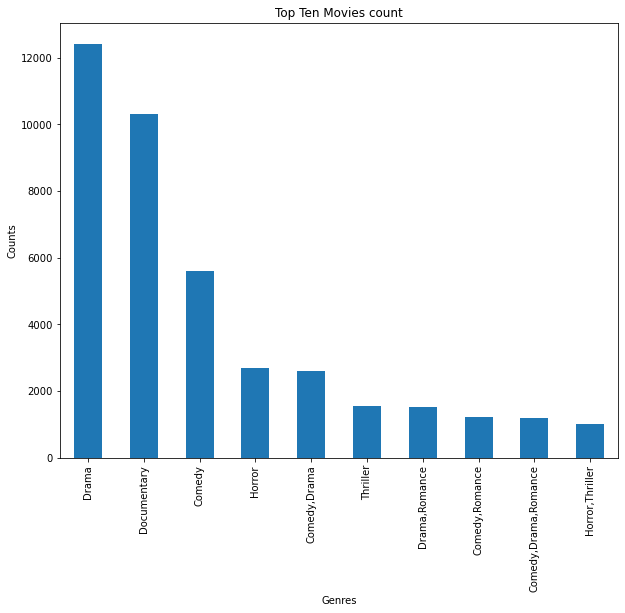

In [38]:
# Top ten catergories of movies.
value_counts = df5.genres.value_counts().head(10)
value_counts.plot(kind='bar',figsize=(10,8), title='Top Ten Movies count', xlabel='Genres' ,ylabel='Counts')
plt.show()

In [39]:
# Top 10 most voted in movies
df13 = df5.sort_values('averagerating', ascending=False).head(10)
df13

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,2019,77.0,"Adventure,Comedy",10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
73616,tt9715646,Renegade,2019,95.0,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History",10.0,6
878,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
64646,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
9745,tt1770682,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
702,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
49925,tt4944240,Dog Days in the Heartland,2017,95.0,Drama,10.0,5


In [40]:
a = df13.genres.value_counts()
a

Documentary            5
Drama                  1
Crime,Documentary      1
Adventure,Comedy       1
Documentary,History    1
Comedy,Drama           1
Name: genres, dtype: int64

In [41]:
a=df13['start_year'].max()
b=df13['start_year'].min()
range = a-b
print("From",b, 'to' ,a, "year range", range)

From 2010 to 2019 year range 9


In [42]:
df13.groupby('genres')

In [43]:
# voting for top 10 movies
#votes_per_genre = df5.groupby('genres').numvotes..sort_values(column_name,ascending=Flase)
#df5.groupby('genres').numvotes.mean()
# Avarage voting per movie genre.

In [44]:
#votes_per_genre = df5.groupby('genres').numvotes..sort_values(column_name,ascending=Flase)
mean_votes =df5.groupby('genres').numvotes.max()
m = mean_votes.sort_values(ascending=False).head(10)
m
# Avarage voting per movie genre.

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Name: numvotes, dtype: int64

Observation, Action,Adventure,Sci-Fi are the most voted in movies.

In [45]:
rating =df5.groupby('genres').averagerating.max()
Top_ten_rating = rating.sort_values(ascending=False).head(10)
Top_ten_rating

# Avarage voting per movie genre.

genres
Comedy,Drama                   10.0
Adventure,Comedy               10.0
Drama                          10.0
Documentary,History            10.0
Documentary                    10.0
Crime,Documentary              10.0
Documentary,Music               9.8
Comedy,Documentary              9.8
Biography,Documentary,Music     9.8
Biography,Documentary,Drama     9.8
Name: averagerating, dtype: float64

Observation; documentary, Comedy and darma are among the movies with the most highy rating.

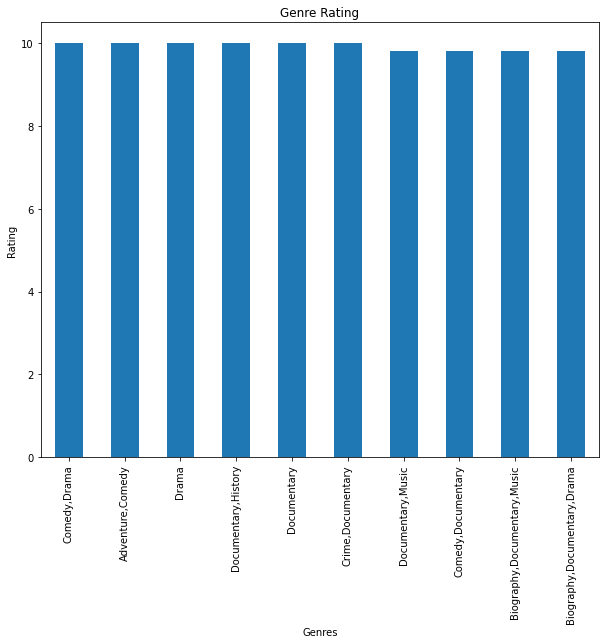

In [46]:
m_rating = rating.sort_values(ascending=False).head(10)
m_rating.plot(kind='bar',figsize=(10,8), title='Genre Rating', xlabel='Genres',ylabel='Rating')
plt.show()

In [47]:
# running time for movies by genre.
#df13.groupby('genres').runtime_minutes.mean()
print(df13['runtime_minutes'].dtype)


float64


In [48]:
df13['runtime_minutes'] = pd.to_numeric(df13['runtime_minutes'])
print(df13['runtime_minutes'].dtype)

float64


In [49]:
average_time = df5.groupby(['genres', 'averagerating']).runtime_minutes.mean()
average_time.sort_values(ascending=False )
#average_time.sort_values(by=['averagerating', 'runtime_minutes'], ascending=False)


genres                         averagerating
Comedy,History                 8.6              1100.000000
Documentary                    5.0              1062.730769
Drama,Fantasy,Musical          8.5               808.000000
Adventure,Drama,Fantasy        7.8               485.000000
Biography,Crime,Documentary    8.9               279.000000
                                                   ...     
Biography,Documentary,Music    5.9                11.000000
Biography,Documentary,Sport    4.3                10.000000
Documentary,Family,Romance     9.7                10.000000
Adventure,Animation,Biography  6.8                 6.000000
Documentary,Musical            9.4                 4.000000
Name: runtime_minutes, Length: 12913, dtype: float64

In [50]:
df7.head(1)

,index,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77,Toy Story 3,BV,415000000.0,652000000.0,2010


In [51]:
#Top genres average rating and time.
rating =df5.groupby(['genres','runtime_minutes']).averagerating.max()
Top_ten_rating = rating.sort_values(ascending=False).head(10)
Top_ten_rating

genres             runtime_minutes
Documentary        93.0               10.0
                   99.0               10.0
                   95.0               10.0
                   48.0               10.0
                   70.0               10.0
Drama              95.0               10.0
Documentary        52.0               10.0
Crime,Documentary  100.0              10.0
Comedy,Drama       129.0              10.0
Documentary        72.0               10.0
Name: averagerating, dtype: float64

Observation, Comedy,drama has a running time of 129 minute while Documentaries has got an average time of 52 minutes.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [53]:
studio_foreign_income = df.groupby('studio').foreign_gross.max()
Top_studio_foreign_income = studio_foreign_income.sort_values(ascending=False).head(5)
Top_studio_foreign_income

studio
WB      960500000.0
BV      946400000.0
Uni.    891800000.0
HC      867600000.0
Par.    858600000.0
Name: foreign_gross, dtype: float64

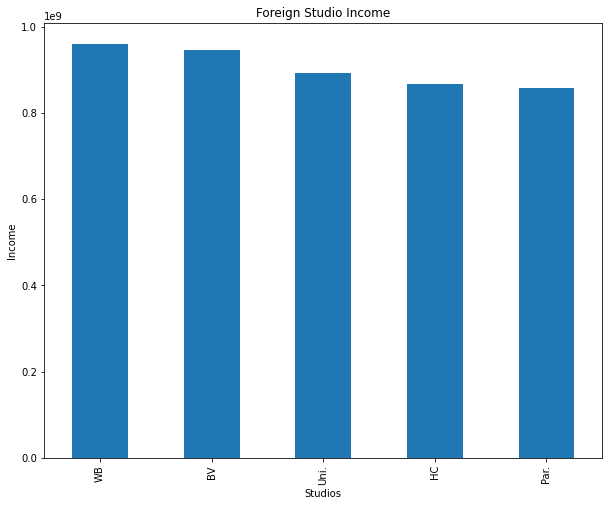

In [54]:
Top_studio_foreign_income = studio_foreign_income.sort_values(ascending=False).head(5)
Top_studio_foreign_income.plot(kind='bar',figsize=(10,8), title='Foreign Studio Income', xlabel='Studios',ylabel='Income')
plt.show()

In [55]:
studio_domestic_gross  = df.groupby('studio').domestic_gross .max()
Top_studio_domestic_gross  = studio_domestic_gross .sort_values(ascending=False).head(5)
Top_studio_domestic_gross 

studio
BV      936700000.0
Uni.    652300000.0
WB      448100000.0
LGF     424700000.0
Sony    404500000.0
Name: domestic_gross, dtype: float64

In [56]:
mean_domestic = round( df.domestic_gross.mean())
mean_foreign = round(df.foreign_gross.mean())
print('The average domestic earning were', mean_domestic)
print('The average foreign earning were', mean_foreign)

The average domestic earning were 28745845.0
The average foreign earning were 74872810.0


This show that foreign markets generated the highest income inthe movie markets.

In [57]:
df.studio.value_counts().head(10)

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64